In [2]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [3]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


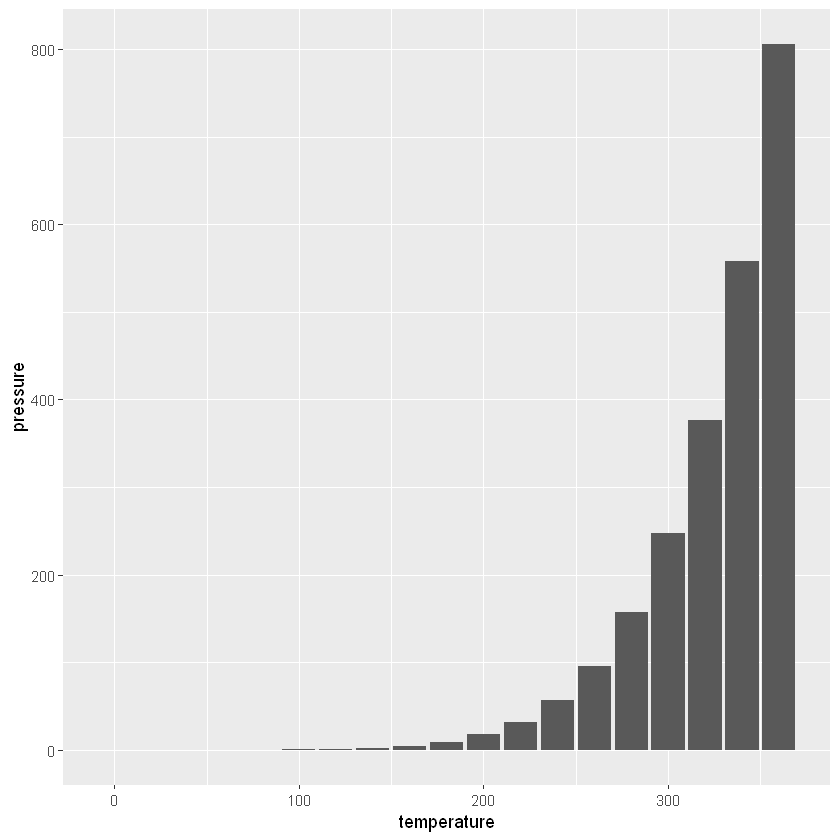

In [9]:
ggplot(data = pressure, aes(x = temperature, y = pressure)) +
geom_col()


In [11]:
# dataframe = df
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>% 
select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>% 
arrange(customer_id, reserv_no, item_id)
head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [12]:
df_sct_graph <- df_cfm_order %>% 
group_by(customer_id) %>% 
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))
head(df_sct_graph)

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


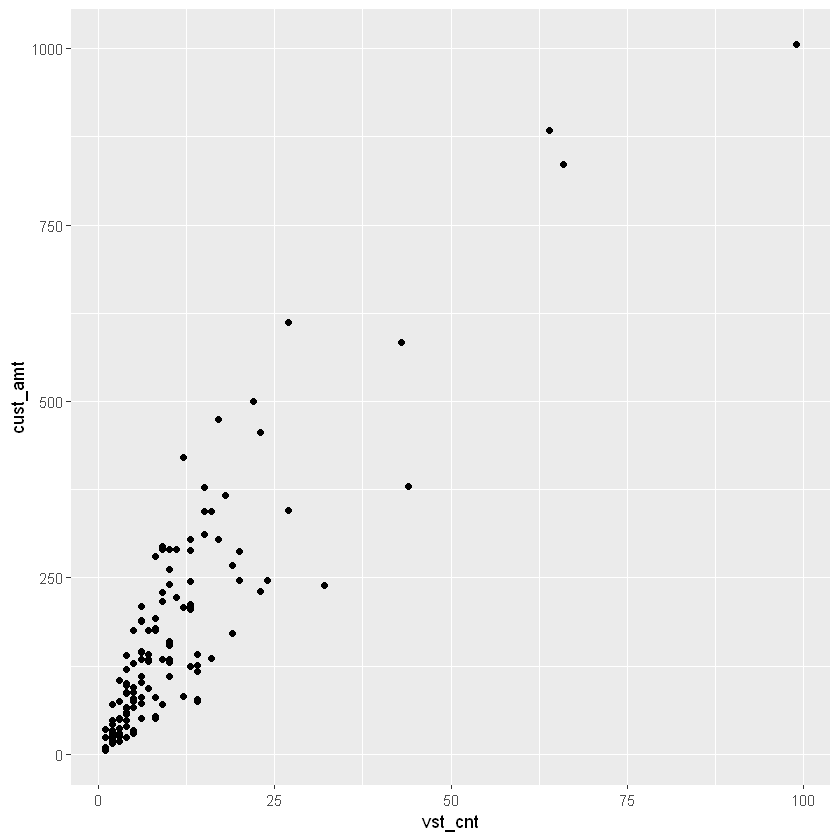

In [16]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt)) +
geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

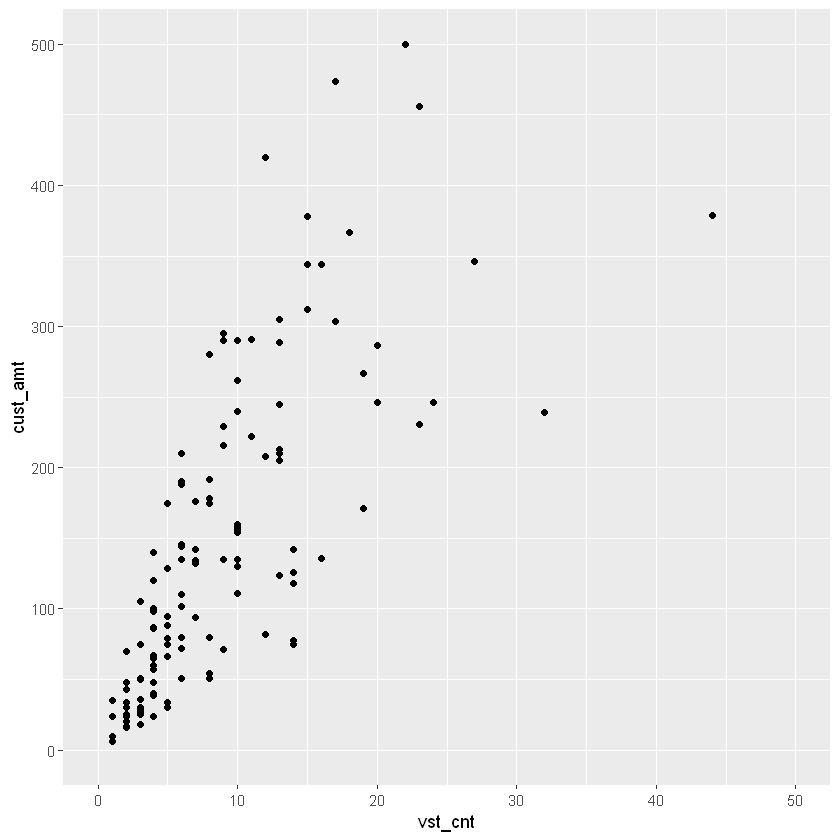

In [17]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt)) +
geom_point() +
xlim(0,50) + ylim(0,500)

In [18]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = "customer_id") %>% 
select(vst_cnt, cust_amt, sex_code)
head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

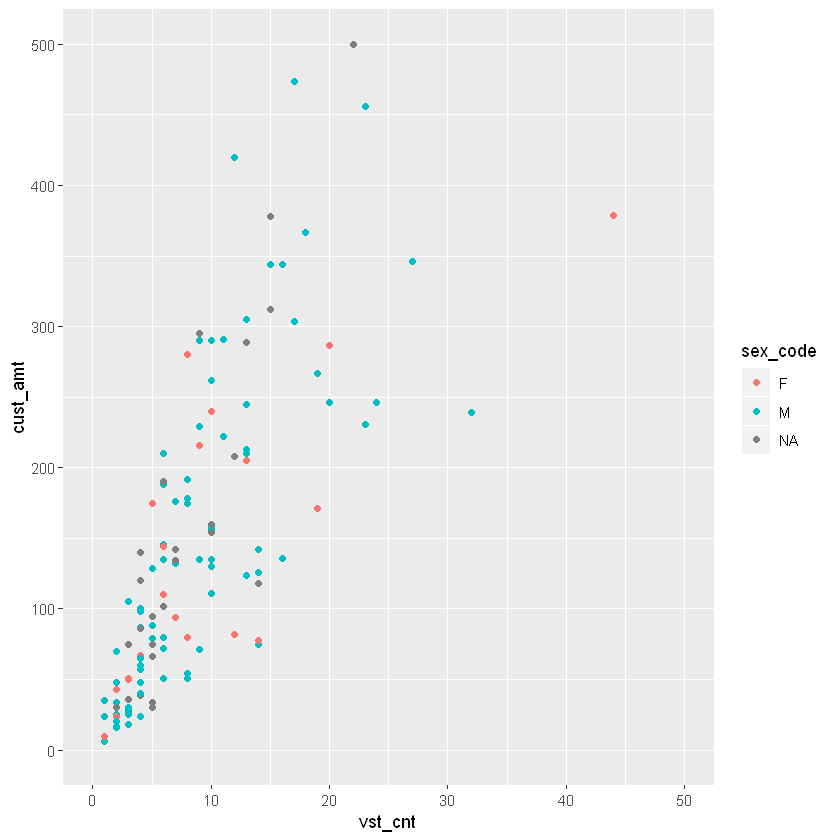

In [20]:
ggplot(data = df_sct_graph2, aes(x=vst_cnt, y=cust_amt,color=sex_code)) +
geom_point() +
xlim(0,50) +
ylim(0,500)

In [23]:
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>% 
select(branch, sales) %>% 
arrange(branch, sales)

In [24]:
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>% summarise(amt = sum(sales)/1000) %>% 
arrange(desc(amt))
df_branch_sales_2

branch,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


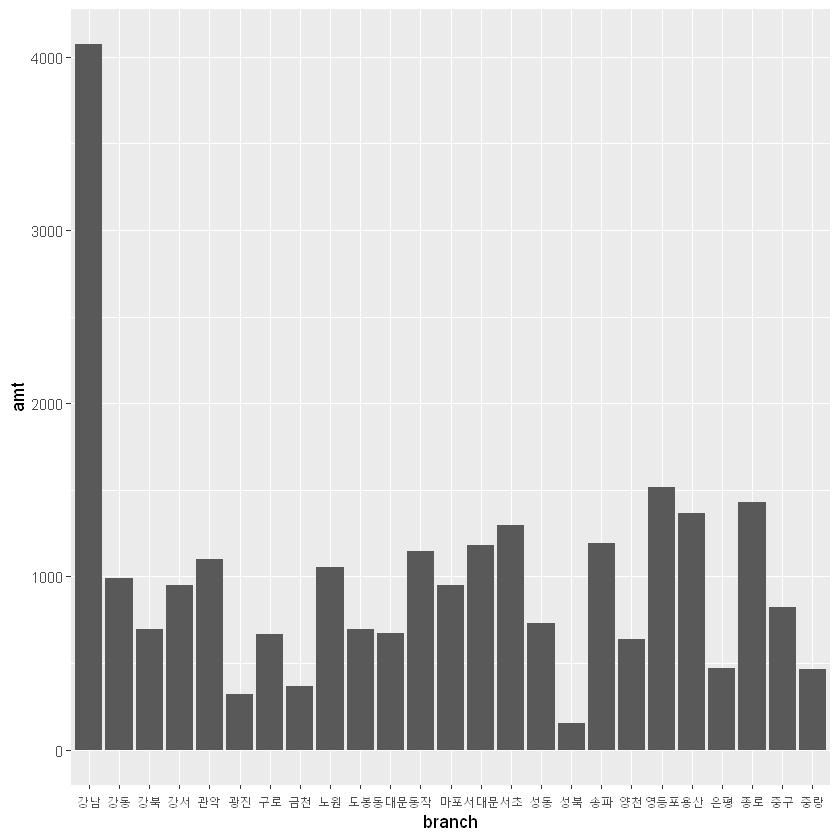

In [26]:
ggplot(df_branch_sales_2, aes(x= branch, y = amt))+ geom_bar(stat = "identity")

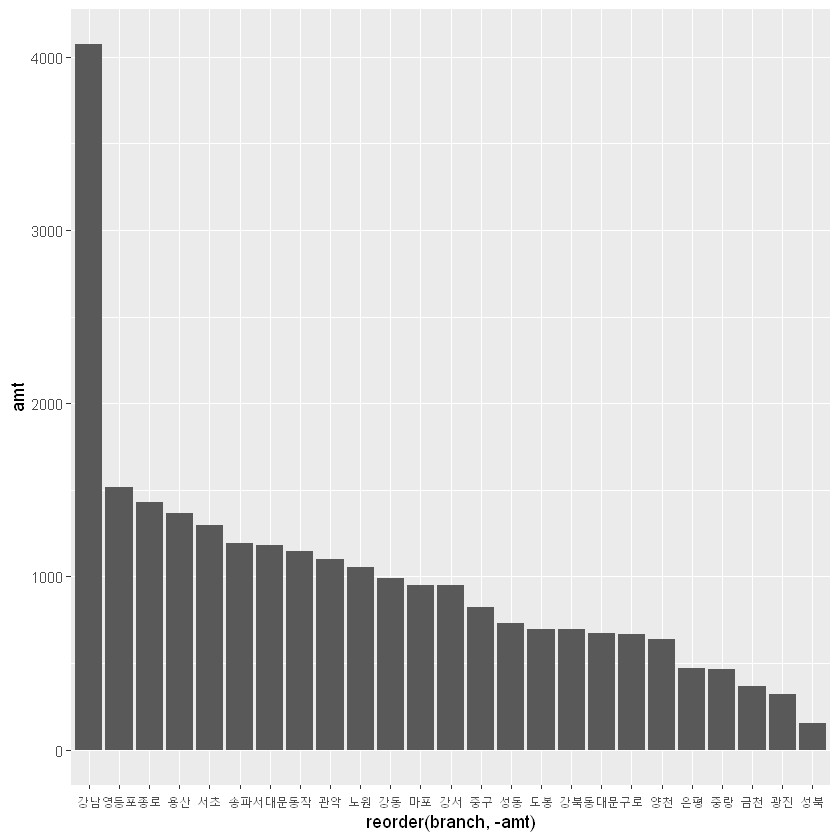

In [28]:
# 막대 그래프 순서 정렬 하기 reorder() 함수 사용
ggplot(df_branch_sales_2, aes(x= reorder(branch, -amt), y = amt))+ geom_bar(stat = "identity")

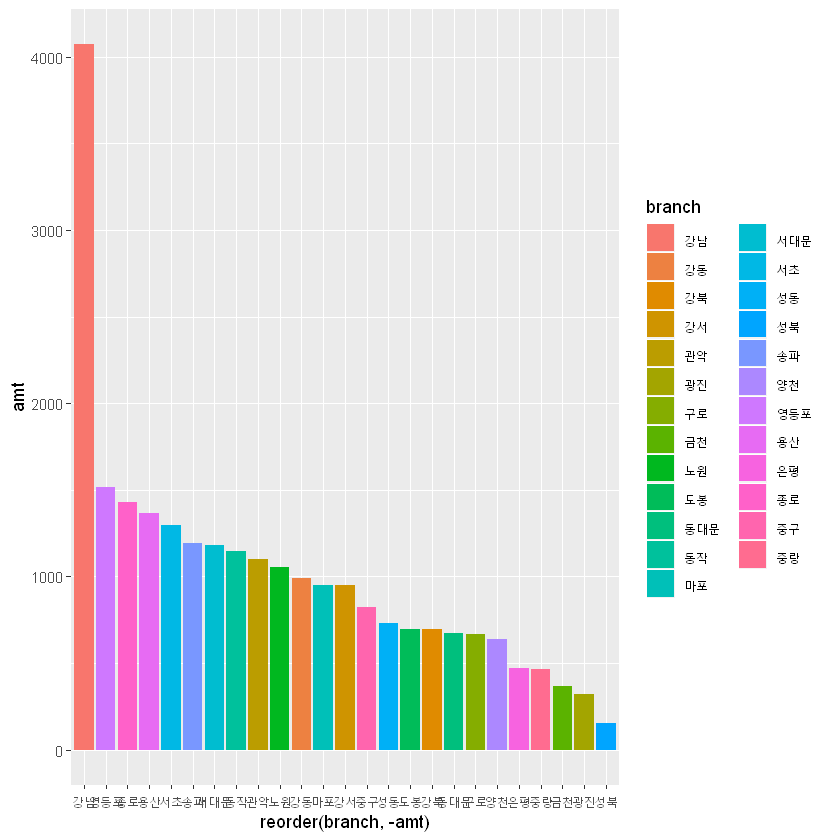

In [29]:
# 자동으로 막대 그래프에 생상 채우기 fill = 색을 칠하고 싶은 값
ggplot(df_branch_sales_2, aes(x= reorder(branch, -amt), y = amt, fill = branch))+ geom_bar(stat = "identity")

Warning message:
"Removed 19 rows containing missing values (position_stack)."

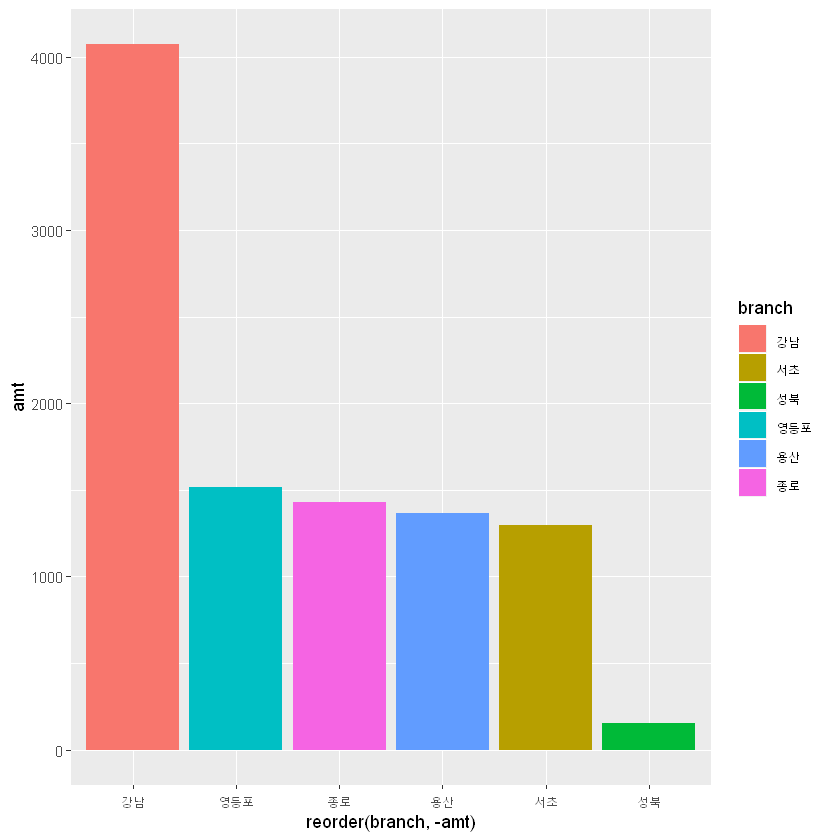

In [31]:
# 원하는 값만 출력 하기 xlim()함수 추가
gg <- ggplot(df_branch_sales_2, aes(x= reorder(branch, -amt), y = amt, fill = branch))+ 
geom_bar(stat = "identity") +
xlim(c("강남", "영등포", "종로", "용산", "서초", "성북"))
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

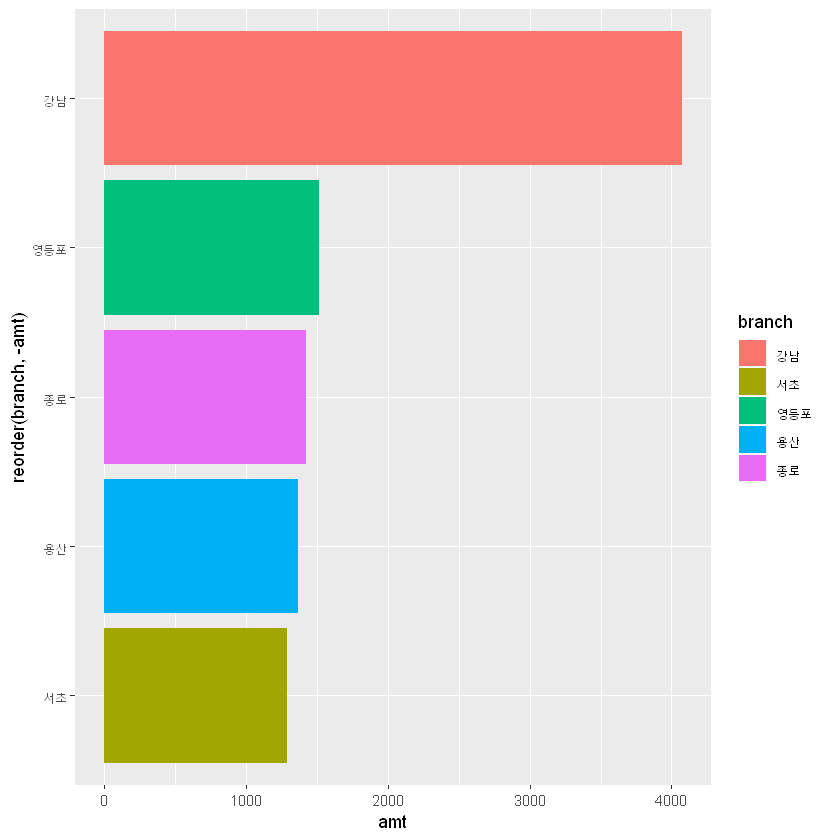

In [33]:
# x 축과 y축을 바꿈
gg <- ggplot(df_branch_sales_2, aes(x= reorder(branch, -amt), y = amt, fill = branch))+ 
geom_bar(stat = "identity") +
xlim(c("서초", "용산", "종로", "영등포", "강남")) # 보기 좋게 하기 위하여 순서를 바꾸어 주었다.

gg <- gg + coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

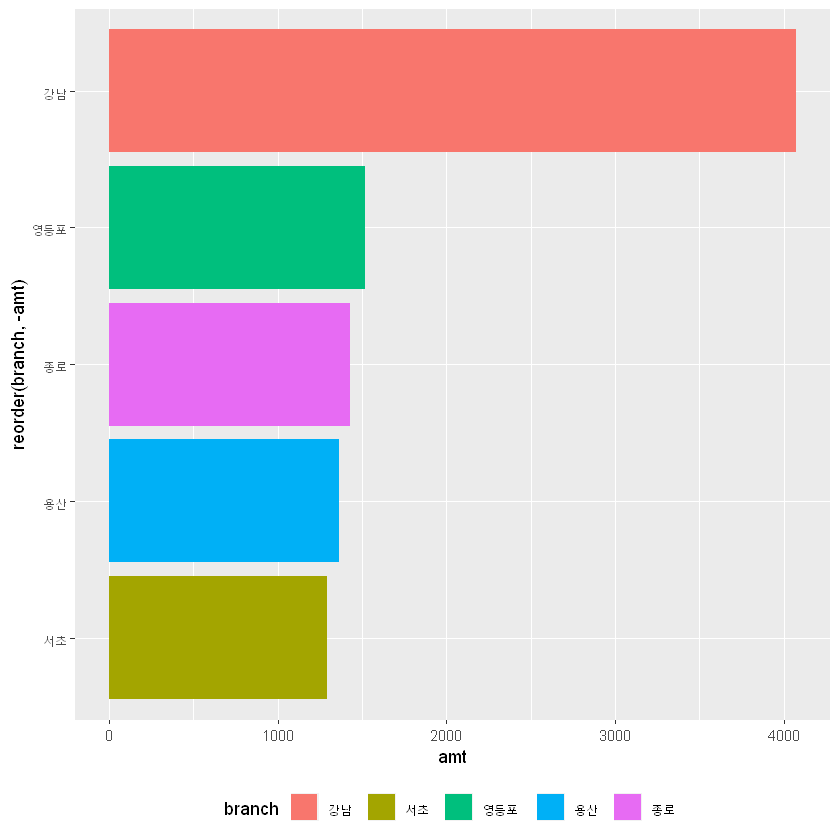

In [34]:
# 범례 위치 바꾸기
gg <- gg + theme(legend.position = "bottom")
gg

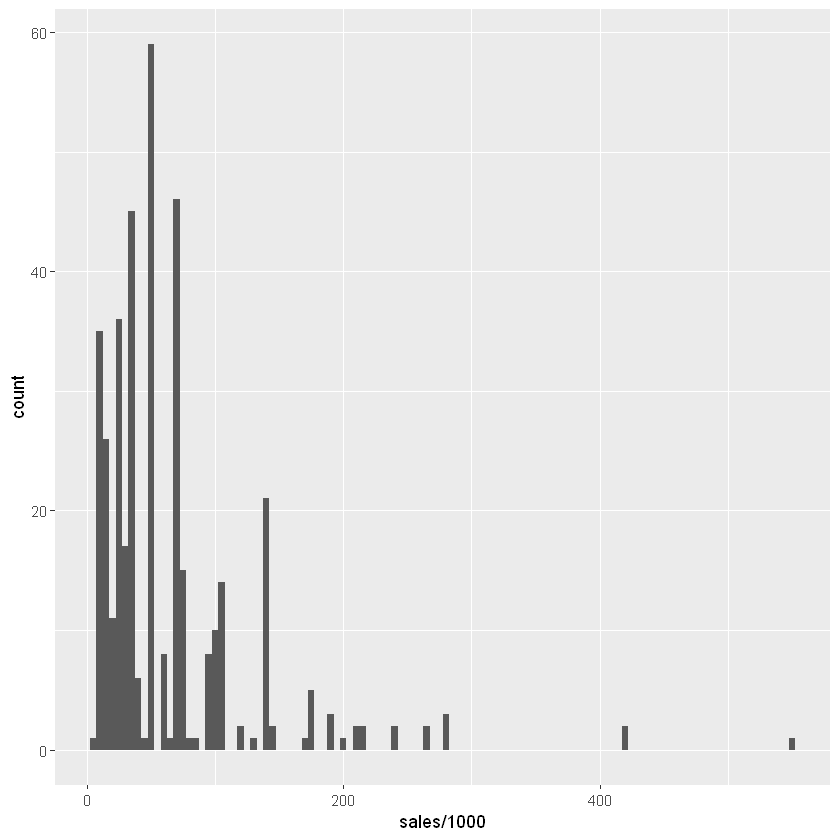

In [4]:
ggplot(data=order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [6]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>% 
group_by(item_id, product_name) %>% 
summarise(amt_item = sum(sales/1000)) %>% 
select(item_id, amt_item, product_name)

df_pie_graph

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


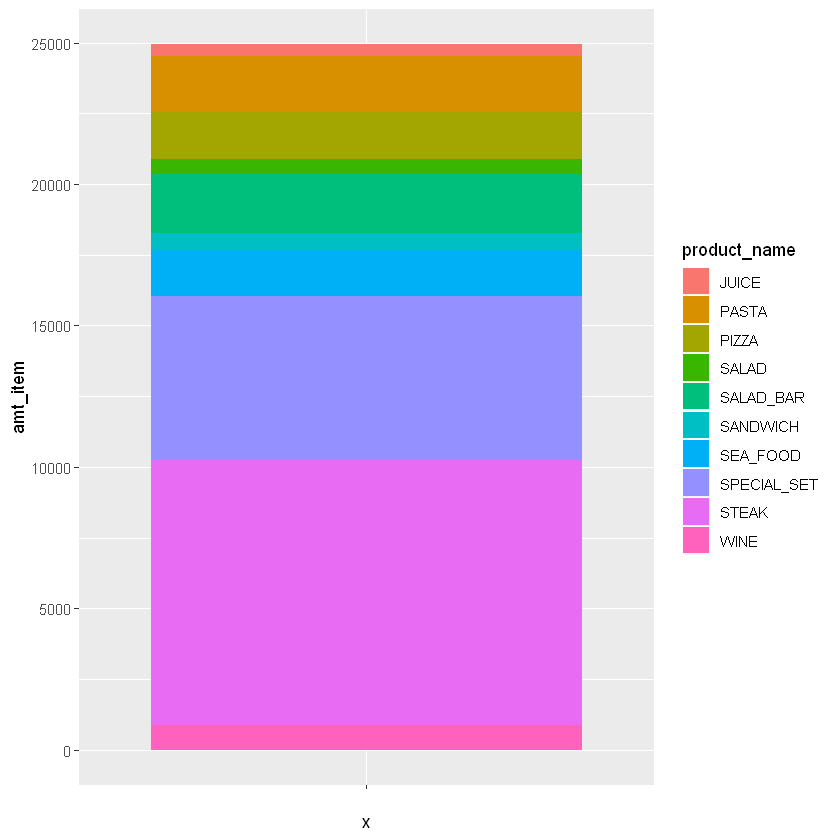

In [7]:
# 누적 막대 그래프 
ggplot(df_pie_graph, aes(x = "", y =amt_item, fill = product_name)) +
geom_bar(stat = "identity")

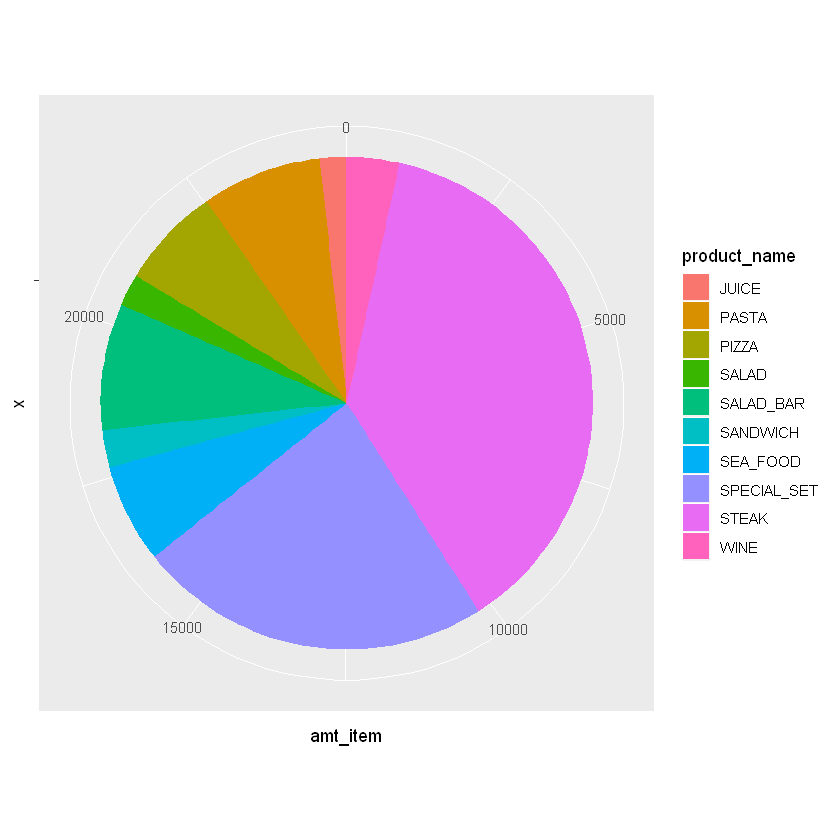

In [8]:
# 파이 차트 그리기
gg <- ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
geom_bar(stat = "identity") +
coord_polar("y",start = 0)
gg

Warning message in pal_name(palette, type):
"Unknown palette Orange"Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
"

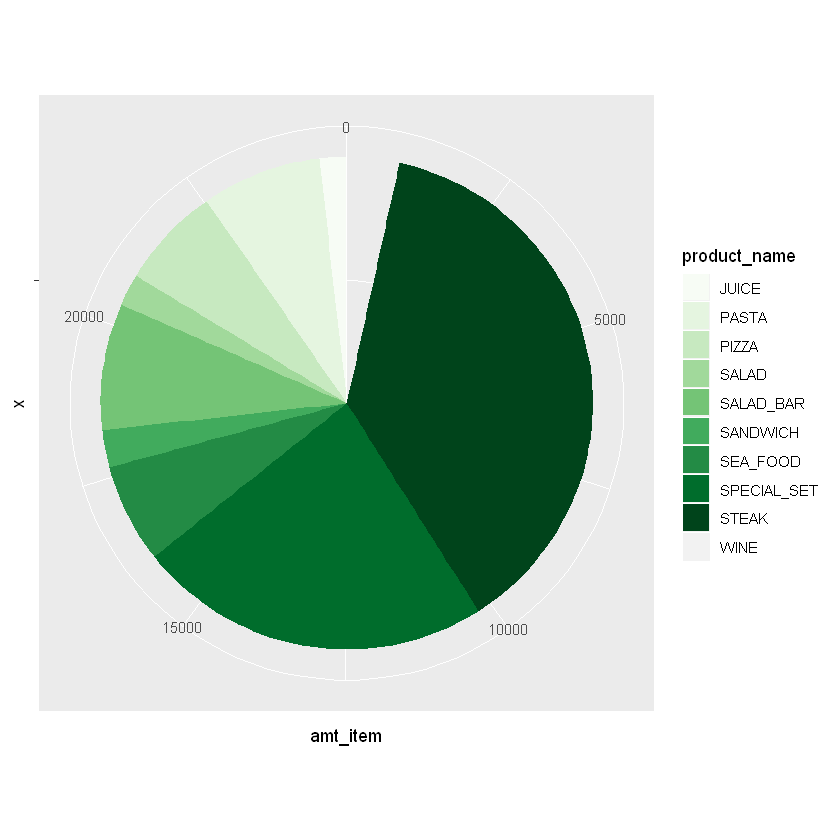

In [11]:
# 팔레트 색상으로 채워 넣기
gg <- gg + scale_fill_brewer(palette = "Orange")
gg

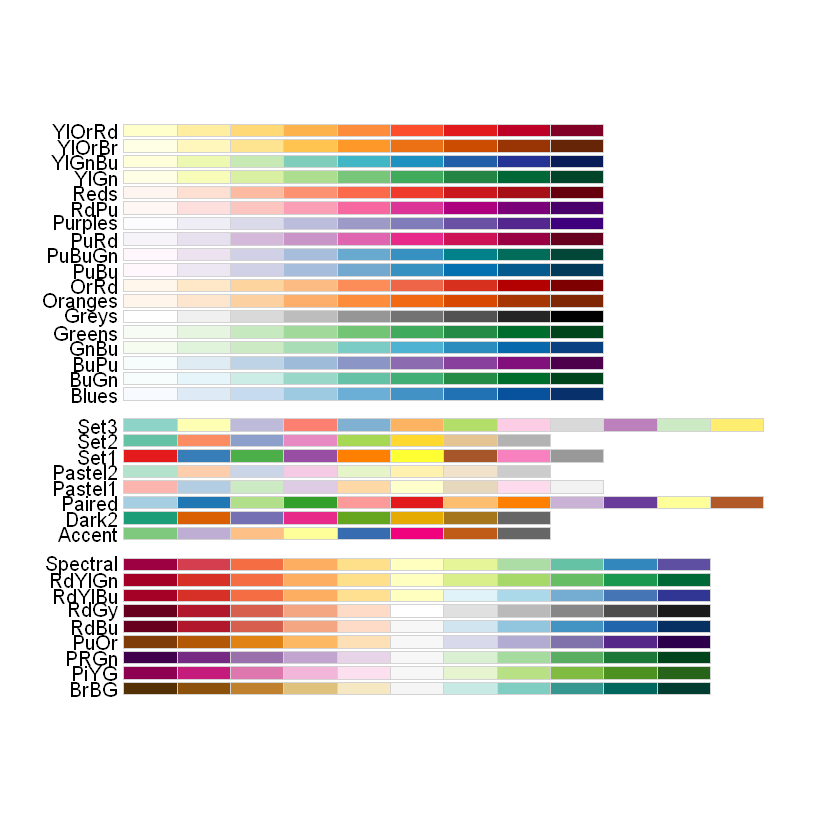

In [10]:
# 팔레트 색상표
library(RColorBrewer)
display.brewer.all()